In [1]:
from gamearg import *
from IPython.display import display, Image

## Facts Define

In [2]:
%%file files/test.lp
move(a,b).
move(a,c).
move(k,l).
move(c,d).
move(c,e).
move(l,e).
move(l,m).
move(d,e).
move(e,d).
move(e,m).
move(m,e).
move(d,f).
move(d,g).
move(g,d).
move(e,h).
move(m,n).
move(n,m).

Overwriting files/test.lp


**Note**: For the given example, if you change the `reverse` paramater to `True` you will get 4 possible worlds below; `False` results in 2 possible worlds.

In [3]:
# You only need edit this cell
input_file = "files/test.lp"
keyword = "game" #arg or game depends on the graphvis_settings.json
reverse = True  # whether you want to reverse the edge direction

## Show Plain Graph

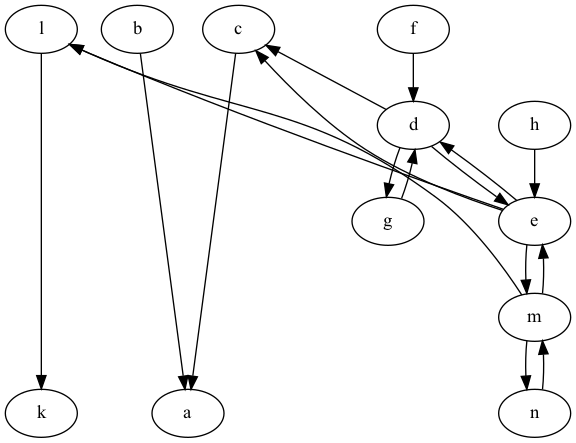

In [4]:
show_plain(input_file, keyword, reverse)

## Well-Founded Semantics

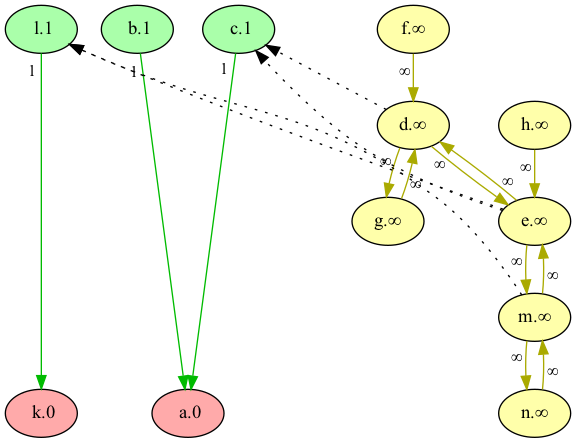

In [5]:
show_wfs(input_file, keyword, reverse)

## Stable Models

In [6]:
show_stb(input_file, keyword, reverse)

In [7]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [8]:
df_wfs_stb

,node,state_id,wfs,pw_1,pw_2,pw_3,pw_4
0,a,0,lost,lost,lost,lost,lost
1,k,0,lost,lost,lost,lost,lost
2,l,1,won,won,won,won,won
3,c,1,won,won,won,won,won
4,b,1,won,won,won,won,won
5,d,∞,draw,lost,lost,won,won
6,e,∞,draw,won,won,lost,won
7,m,∞,draw,lost,won,won,lost
8,f,∞,draw,won,won,lost,lost
9,g,∞,draw,won,won,lost,lost


In [9]:
count_columns = [col for col in df_wfs_stb.columns if col.startswith('pw_')]
df_wfs_stb['lost_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == 'lost'), axis=1)
df_wfs_stb['won_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == 'won'), axis=1)
aggregated_counts = df_wfs_stb.groupby('node').agg({'lost_count': 'sum', 'won_count': 'sum'}).reset_index()

aggregated_counts

,node,lost_count,won_count
0,a,4,0
1,b,0,4
2,c,0,4
3,d,2,2
4,e,1,3
5,f,2,2
6,g,2,2
7,h,3,1
8,k,4,0
9,l,0,4
